In [29]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

The sourcec code obtained from https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.shape

(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
df['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [7]:
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train_pa) 
tfidf_test = tfidf_vectorizer.transform(X_test_pa)

In [9]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train_pa)
#DataFlair - Predict on the test set and calculate accuracy
y_pred_pa = pac.predict(tfidf_test)
score = accuracy_score(y_test_pa, y_pred_pa)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.58%


Data clean-up, delete missing datas from news.csv and save to news_clean.csv

**這段跑一次即可，不然會出現錯誤訊息，因為已經原資料已經修改過了

In [10]:
empty = []
for i in range(len(df.text)):
    if(df.text[i] == ' '):
        empty.append(i)
df = df.drop(empty)
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ["title"])
df.reset_index(drop=True)
df.to_csv('News_clean.csv')
# Save cleaned data to news_clean.csv
df_new = pd.read_csv('News_clean.csv').drop(columns = ['Unnamed: 0'])
df_new.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [11]:
df_new.shape

(6299, 2)

In [12]:
X = df_new['text']
y = df_new['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [62]:
print('Original:')
print(X[0])

print('Encoded:')
print(tfidf_train[0])

print('Inverse Transformed:')
print(tfidf_vectorizer.inverse_transform(tfidf_train[0]))

Original:
Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is being warned that the e

In [33]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

81.852 %
Confusion matrix, without normalization


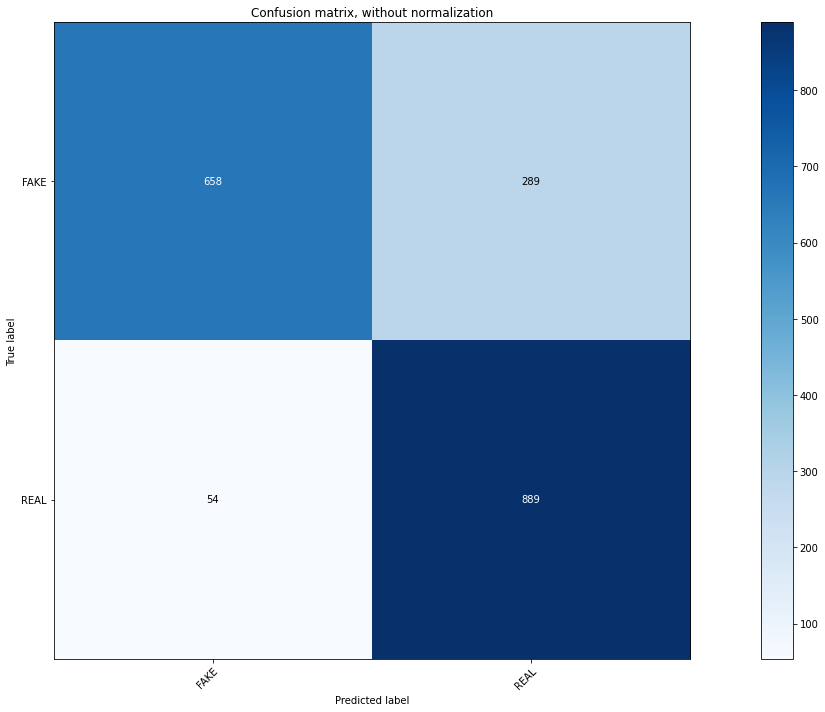

              precision    recall  f1-score   support

        FAKE       0.92      0.69      0.79       947
        REAL       0.75      0.94      0.84       943

    accuracy                           0.82      1890
   macro avg       0.84      0.82      0.82      1890
weighted avg       0.84      0.82      0.82      1890



In [54]:
clf = KNeighborsClassifier(n_neighbors= 7)
clf.fit(tfidf_train, y_train)
y_pred = clf.predict(tfidf_test)

score = accuracy_score(y_test, y_pred)
score *= 100
print("%0.3f" %score, '%')

cm = confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])
print(classification_report(y_test, y_pred))

The test article is obtained from: https://www.factcheck.org/2020/02/fake-coronavirus-cures-part-2-garlic-isnt-a-cure/

The article is about garlic can cure Covid-19, which is a fake news.

Test: The test data is a fake news which claims that freshly boiled garlic water can cure corona virus, which is fake.

In [67]:
test = "Good news, Wuhan’s corona virus can be cured by one bowl of freshly boiled garlic water. Old Chinese doctor has proven it’s efficacy.  Many patients has also proven this to be effective. Eight (8) cloves of chopped garlics add seven (7)cups of water and bring to boil.,  Eat and drink the boiled garlic water, overnight improvement and healing. Glad to share this."

In [68]:
test_tfi = tfidf_vectorizer.transform([test])
pred = clf.predict(test_tfi)
print(pred)

['FAKE']
